In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("../..")
from config.settings import DIRECTORY_COMBINED_MATCHES_CLEAN_AGG, DIRECTORY_MLS_MODEL, Club, Features, DIRECTORY_COMBINED_MATCHES_WITH_FEATURES, get_features

mpl.rcParams['axes.grid'] = "True"
mpl.rcParams['axes.spines.top'] = "False"
mpl.rcParams['axes.spines.right'] = "False"
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

df_mls = pd.read_csv(DIRECTORY_COMBINED_MATCHES_WITH_FEATURES)
df_mls

,Unnamed: 0,Team,SH,SoT,SCA,GCA,npxG,GF,Pts
0,0,Atlanta-United,4190.0,1416.0,7210.0,752.0,199.3,232.0,182.0
1,1,Austin-FC,3430.0,1114.0,5890.0,658.0,173.2,195.0,168.0
2,2,CF-Montreal,3170.0,1084.0,5632.0,676.0,176.3,198.0,195.0
3,3,Chicago-Fire,3420.0,1128.0,5840.0,534.0,166.3,164.0,143.0
4,4,Colorado-Rapids,3434.0,1168.0,6086.0,612.0,176.3,193.0,181.0
5,5,Columbus-Crew,3994.0,1372.0,7026.0,814.0,198.8,255.0,216.0
6,6,DC-United,3500.0,1144.0,5998.0,652.0,173.8,193.0,154.0
7,7,FC-Cincinnati,3906.0,1424.0,6618.0,752.0,198.2,239.0,197.0
8,8,FC-Dallas,3430.0,1174.0,5736.0,660.0,168.3,203.0,173.0
9,9,Houston-Dynamo,3780.0,1292.0,6212.0,610.0,171.3,205.0,171.0


['SH', 'SoT', 'SCA', 'GCA', 'GF', 'npxG']


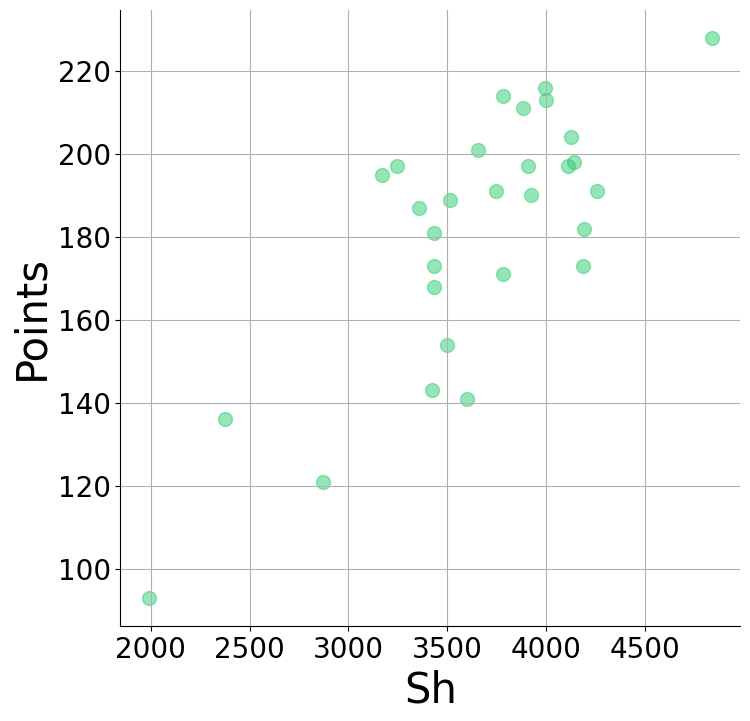

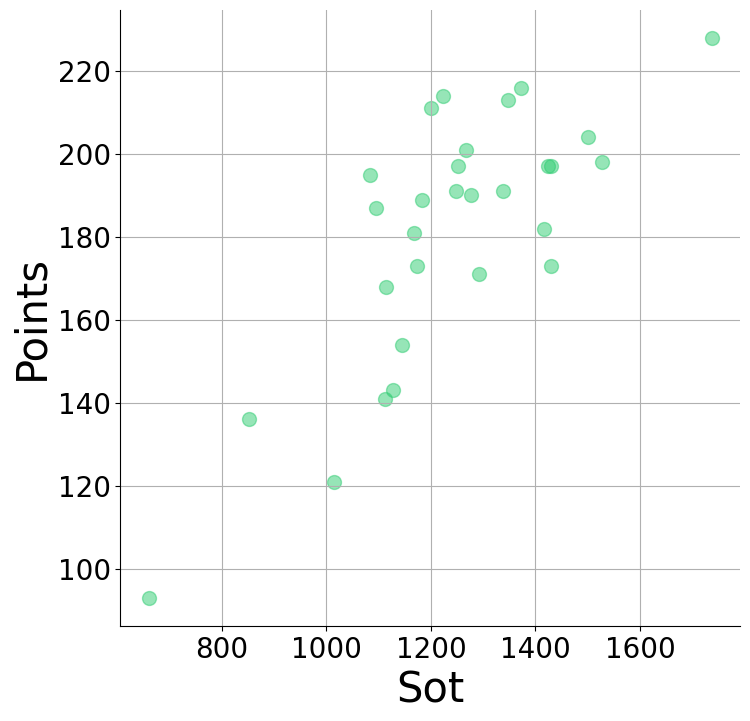

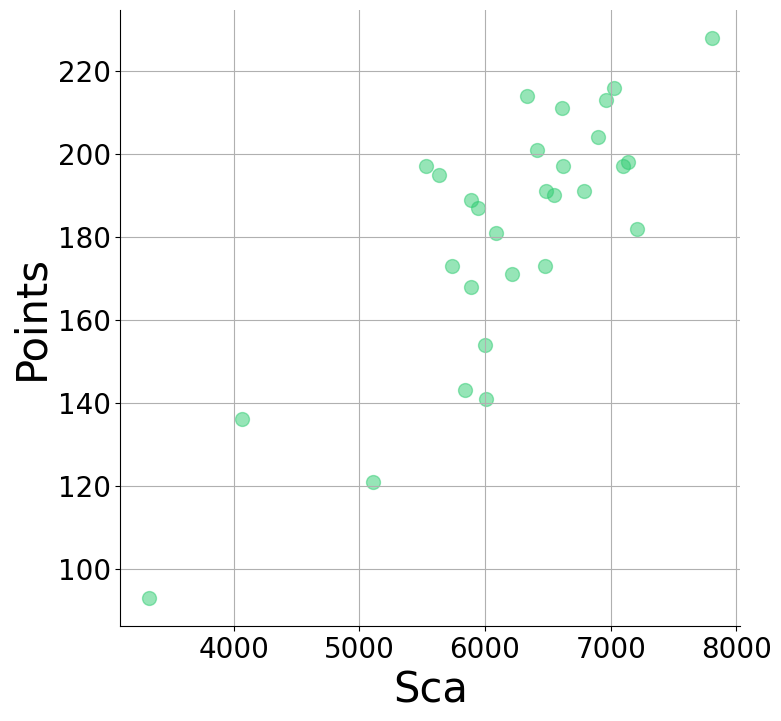

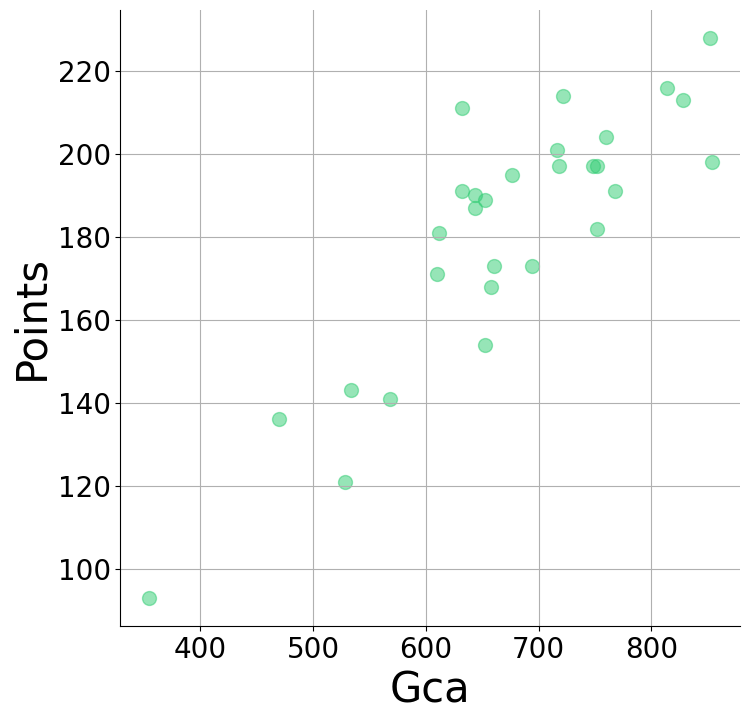

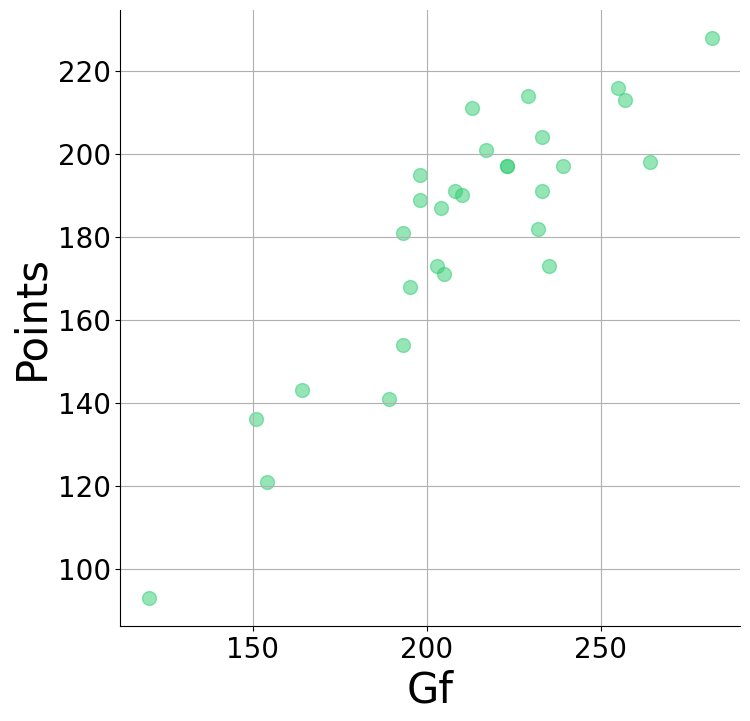

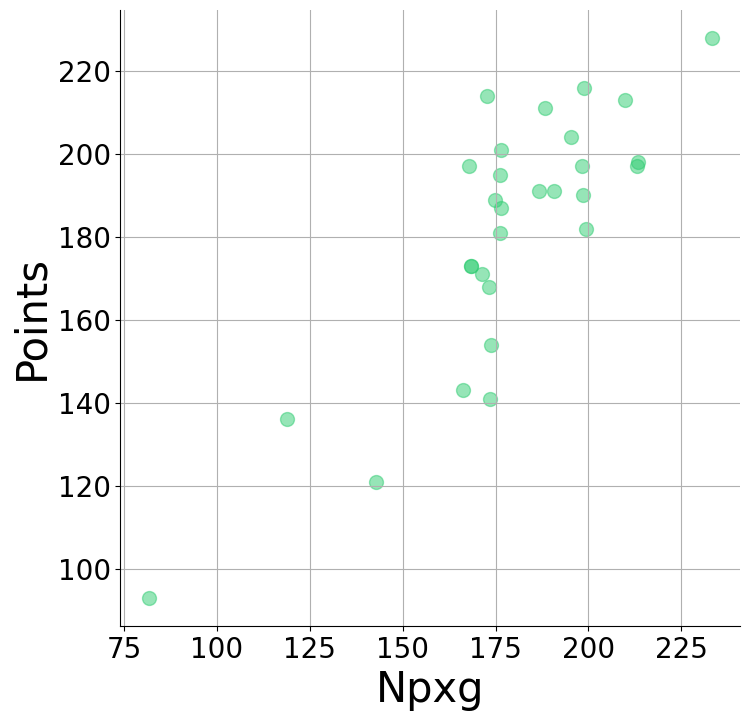

In [ ]:
features = get_features()

for feat in features:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(df_mls[feat], df_mls[Features.Pts.value], s=100, alpha=0.5, c='#2ECC71')
    ax.set_ylabel("Points", fontsize=30)
    ax.set_xlabel(feat.capitalize(), fontsize=30)
    plt.show()

In [3]:
from sklearn import linear_model

features = df_mls[features]
target   = df_mls[Features.Pts.value]
regr = linear_model.LinearRegression(fit_intercept=False)
model = regr.fit(features, target)
model.score(features, target)

0.8116632013424225

In [4]:
from joblib import dump, load

dump(model, DIRECTORY_MLS_MODEL)

['../../data/mls_model.joblib']